In [1]:
import pandas as pd

# Load the dataset
file_path = './data/train.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
# print(data.head())
# print(data.info())
# print(data.describe())


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


# Drop columns with more than 50% missing values
threshold = 0.5
missing_percentages = data.isnull().mean()
columns_to_drop = missing_percentages[missing_percentages > threshold].index
data = data.drop(columns=columns_to_drop)

# Handle remaining missing values

# Fill numerical columns with the median value
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Fill categorical columns with the mode value
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))

# Encode categorical variables
# encoder = LabelEncoder()
# for col in categorical_columns:
#     data[col] = encoder.fit_transform(data[col])
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical_cols = pd.DataFrame(encoder.fit_transform(data[categorical_columns]),index=data.index)
encoded_categorical_cols.columns = encoder.get_feature_names_out(categorical_columns)
data = data.drop(columns=categorical_columns, axis=1).join(encoded_categorical_cols)

# Feature scaling
scaler = StandardScaler()
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Separate features and target
X = data.drop('SalePrice', axis=1)  # Replace 'target_column' with the actual target column name
y = data['SalePrice']

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_val_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [7]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset

# # Convert data to PyTorch tensors
# X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
# X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# # Create DataLoader
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# # Define the neural network model
# class HousingPriceModel(nn.Module):
#     def __init__(self, input_dim):
#         super(HousingPriceModel, self).__init__()
#         self.fc1 = nn.Linear(input_dim, 64)
#         self.fc2 = nn.Linear(64, 32)
#         self.fc3 = nn.Linear(32, 1)
        
#     def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

# input_dim = X_train.shape[1]
# model = HousingPriceModel(input_dim)

# # Define loss function and optimizer
# criterion = nn.MSELoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# # Training loop
# num_epochs = 100
# for epoch in range(num_epochs):
#     for batch_X, batch_y in train_loader:
#         # Forward pass
#         predictions = model(batch_X)
#         loss = criterion(predictions, batch_y)
        
#         # Backward pass and optimization
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
    
#     if (epoch+1) % 10 == 0:
#         print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.0251
Epoch [20/100], Loss: 0.0157
Epoch [30/100], Loss: 0.0110
Epoch [40/100], Loss: 0.0076
Epoch [50/100], Loss: 0.0033
Epoch [60/100], Loss: 0.0014
Epoch [70/100], Loss: 0.0019
Epoch [80/100], Loss: 0.0044
Epoch [90/100], Loss: 0.0010
Epoch [100/100], Loss: 0.0014


Epoch [10/500], Training Loss: 0.5920, Validation Loss: 0.7413
Epoch [20/500], Training Loss: 0.2705, Validation Loss: 0.3558
Epoch [30/500], Training Loss: 0.1927, Validation Loss: 0.2411
Epoch [40/500], Training Loss: 0.1556, Validation Loss: 0.2064
Epoch [50/500], Training Loss: 0.1286, Validation Loss: 0.1831
Epoch [60/500], Training Loss: 0.1094, Validation Loss: 0.1784
Epoch [70/500], Training Loss: 0.0941, Validation Loss: 0.1675
Epoch [80/500], Training Loss: 0.0809, Validation Loss: 0.1593
Epoch [90/500], Training Loss: 0.0691, Validation Loss: 0.1550
Epoch [100/500], Training Loss: 0.0582, Validation Loss: 0.1522
Epoch [110/500], Training Loss: 0.0483, Validation Loss: 0.1501
Epoch [120/500], Training Loss: 0.0401, Validation Loss: 0.1480
Epoch [130/500], Training Loss: 0.0334, Validation Loss: 0.1468
Epoch [140/500], Training Loss: 0.0285, Validation Loss: 0.1454
Epoch [150/500], Training Loss: 0.0247, Validation Loss: 0.1446
Epoch [160/500], Training Loss: 0.0218, Validatio

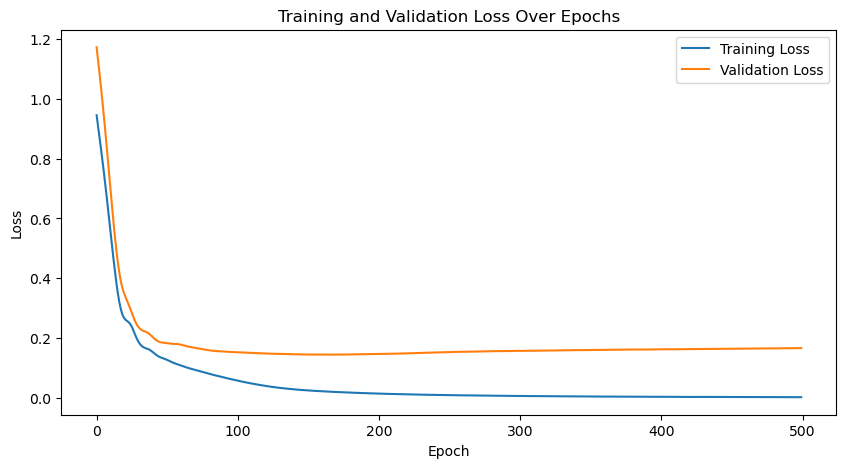

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class HousingPriceModel(nn.Module):
    def __init__(self, input_dim):
        super(HousingPriceModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_dim = X_train_tensor.shape[1]
model = HousingPriceModel(input_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Parameters
num_epochs = 500

# Tracking losses for visualization
train_losses = []
val_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    
    # Forward pass on the entire training set
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Record training loss
    train_loss = loss.item()
    train_losses.append(train_loss)
    
    # Validation phase
    model.eval()
    with torch.no_grad():
        val_predictions = model(X_val_tensor)
        val_loss = criterion(val_predictions, y_val_tensor).item()
        val_losses.append(val_loss)
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# Visualizing the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [8]:
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor)
    test_loss = criterion(test_predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.1563
